<center> <img src=https://zhajiman.github.io/cartopy_introduction/cartopy_log.png width=75% heigth=25%> <center>

Cartopy é um pacote Python projetado para facilitar ao máximo o desenho de mapas para análise e visualização de dados.

Cartopy faz uso das poderosas bibliotecas PROJ.4, numpy e shapely e tem uma interface de desenho simples e intuitiva para matplotlib para criar mapas de qualidade de publicação.

Algumas das principais características do cartopy são:

* definições de projeção orientada a objetos
* transformações de ponto, linha, vetor, polígono e imagem entre projeções
* integração para expor mapeamento avançado no matplotlib com uma interface simples e intuitiva
* poderosa manipulação de dados vetoriais integrando a leitura de shapefile com recursos Shapely


Além disso o cartopy possui integração com o pacote **xarray**

In [1]:
import matplotlib.pyplot as plt
import cartopy.mpl.ticker as cticker
from cartopy.io.shapereader import Reader
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import numpy as np

# Criando o primeiro Mapa

* **Para este primeiro mapa no cartopy vamos utilizar a projeção de Robinson**

Para fazer isso, precisamos definir o tipo de projeção utilizando um parametro do subplots do matplotlib


Passamos como parametro o **``subplot_kw={'projection': nome_projecão}``** -----------         Projeção do Cartopy

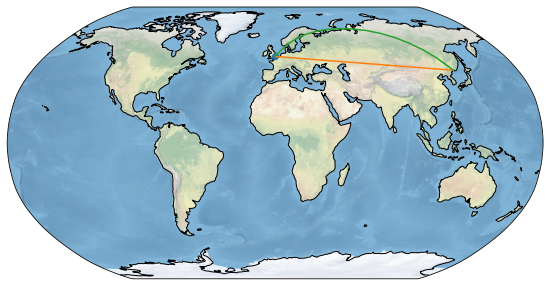

In [2]:
# Criando Figura e definindo a projeção
fig, ax = plt.subplots(figsize=(10, 5), subplot_kw={
                       'projection': ccrs.Robinson()})

# Ativando o plano de fundo
ax.stock_img()
# Definindo linhas de costa
ax.coastlines()

# Plots de pontos
ax.plot(-0.08, 51.53, 'o', transform=ccrs.PlateCarree())
ax.plot([-0.08, 132], [51.53, 43.17], transform=ccrs.PlateCarree())
ax.plot([-0.08, 132], [51.53, 43.17], transform=ccrs.Geodetic())

* **Neste segundo exemplo vamos utilizar uma das projeções mais utilizadas para fazer mapas no cartopy.**

* **A Projeção de PlateCarree**

Alem disso, vamos inserir elementos no mapa (features) para a confecção completa da nossa figura


Estas ***features*** podem ser inseridas através da função **`add_feature`** em conjunto com a função **`cfeature`** que importamos do **``cartopy.feature``**

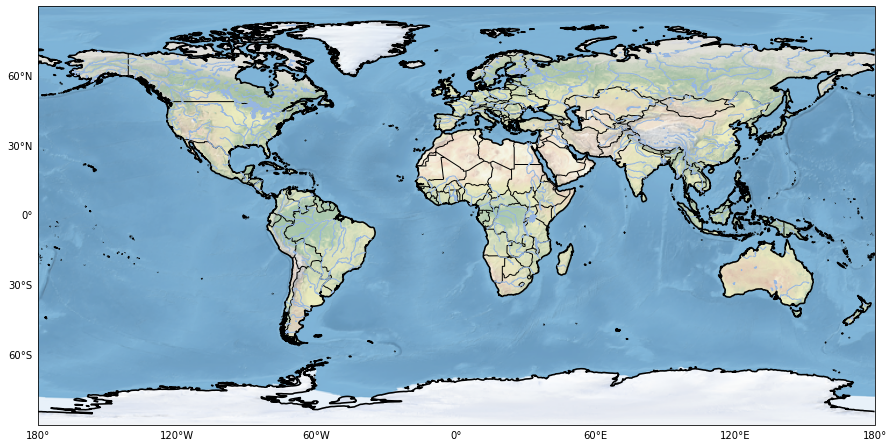

In [3]:
# Criar a figura
fig, ax = plt.subplots(figsize=(15, 8), subplot_kw={
                       'projection': ccrs.PlateCarree()}) # parametro subplot_kw -> Definir a projeção


gl = ax.gridlines(draw_labels=True, linewidth=0) # Grids
gl.top_labels = False # Desligar as labels de x (Parte superior)
gl.right_labels = False # Desligar as labels de y (Parte inferior)
ax.add_feature(cfeature.COASTLINE.with_scale('50m'), linewidth=1.6,edgecolor='k', zorder=10) # Linhas de costa
ax.add_feature(cfeature.BORDERS)
ax.add_feature(cfeature.RIVERS.with_scale('50m'), zorder=10)
ax.add_feature(cfeature.LAKES.with_scale('50m'), zorder=10)
ax.stock_img()

## Fazendo um recorte no Mapa

Por vezes não queremos trabalhar com todo o globo, sendo mais interessante trabalhar apenas com a area de estudo desejada.
Neste contexto utilizamos a função **`.set_extent()`** para definir o recorte no mapa




Passamos como parametros na função:

Uma lista com os limites do seu mapa
xmin, xmax, ymin, ymax em que:

* **xmin -> longitude minima** 

* **xmax -> longitude maxima** 
 
* **ymin -> latitude minima** 

* **ymax -> latitude maxima**

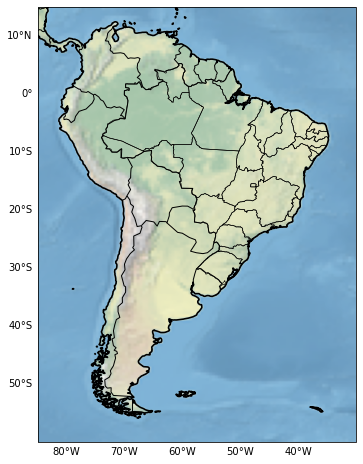

In [4]:
# Criando figura
fig, ax = plt.subplots(figsize=(15, 8), subplot_kw={
                       'projection': ccrs.PlateCarree()})

##########################################################
# Fazendo o recorte na figura
ax.set_extent([-85, -30, -60, 15], crs=ccrs.PlateCarree()) # Definimos tambem a projeção
##########################################################

# Labels
gl = ax.gridlines(draw_labels=True, linewidth=0, color='black', alpha=0.5, linestyle='-')
gl.top_labels = False
gl.right_labels = False

# Inserindo as features
ax.add_feature(cfeature.COASTLINE.with_scale('50m'), linewidth=1.6,edgecolor='k', zorder=10) # Linhas de costa
ax.add_feature(cfeature.STATES.with_scale('50m'),linewidth=0.6,edgecolor='k', zorder=10) 
ax.add_feature(cfeature.BORDERS) # Bordas
# ax.add_feature(cfeature.LAND) # Terra
# ax.add_feature(cfeature.OCEAN) # Oceanos
# ax.add_feature(cfeature.RIVERS.with_scale('110m'), zorder=1) # Rios
#ax.add_feature(cfeature.LAKES.with_scale('50m'), zorder=10) # Lagos
ax.stock_img() # imagem de fundo

## Outro exemplo (com Shapefile)

* Neste outro exemplo vamos usar uma função (**`ShapelyFeature`** e **`Reader`**) do cartopy para fazer a leitura so shapefile e adiciona-lo com a função **`add_feature`**

In [5]:
# Fazendo a leitura do shapefile
shp_path = r'C:/Users/Luiz/Documents/Shapefiles/brazilian_legal_amazon_border\brazilian_legal_amazon.shp'
shp = cfeature.ShapelyFeature(
            Reader(shp_path).geometries(),
            ccrs.PlateCarree(), edgecolor='k',
            facecolor='none')

Text(-63, -5, 'Amazonia Legal')

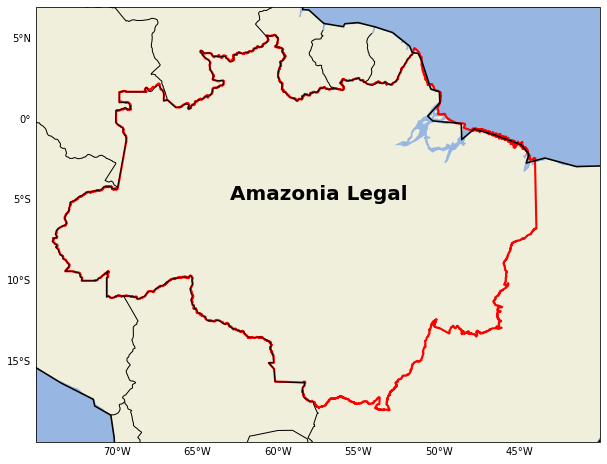

In [6]:
# Criando figura
fig, ax = plt.subplots(figsize=(15, 8), subplot_kw={
                       'projection': ccrs.PlateCarree()})

##########################################################
# Fazendo o recorte na figura
ax.set_extent([-75, -40, -20, 7], crs=ccrs.PlateCarree()) # Definimos tambem a projeção
##########################################################

# Labels
gl = ax.gridlines(draw_labels=True, linewidth=0, color='black', alpha=0.5, linestyle='-')
gl.top_labels = False
gl.right_labels = False


# Inserindo shapefile
ax.add_feature(shp, linewidth=2.1, edgecolor='red',  zorder=1)

# Inserindo as features
ax.add_feature(cfeature.COASTLINE.with_scale('110m'), linewidth=1.6,edgecolor='k') # Linhas de costa
# ax.add_feature(cfeature.STATES.with_scale('50m'),linewidth=0.6,edgecolor='k', zorder=10) 
ax.add_feature(cfeature.BORDERS) # Bordas
ax.add_feature(cfeature.LAND) # Terra
ax.add_feature(cfeature.OCEAN) # Oceanos

# Texto
ax.text(x=-63, y=-5, s='Amazonia Legal', fontsize=20, fontweight='bold')

## Cartopy e Xarray

**Estas duas bibliotecas possuem integração entre si, o qual podemos podemos fazer isto a partir dos métodos de plotagem do xarray e fazer a ligação com o cartopy**

* Vamos importar a lib do xarray e combina-los em um plot

In [7]:
import xarray as xr

Vamos abrir um dataset (CPC-Global Precipitation) e calcular a precipitação mensal.

In [8]:
# Abrindo o banco de dados
ds_tmax = xr.open_dataset('tmax.2021.nc').sel(lat=slice(12, -60), lon=slice(275, 330))

In [9]:
# Calcular a Temperatura máxima mensal
ds_mensal = ds_tmax.resample({'time':'1MS'}).mean(dim='time')

* **Plot da precipitação mensal**

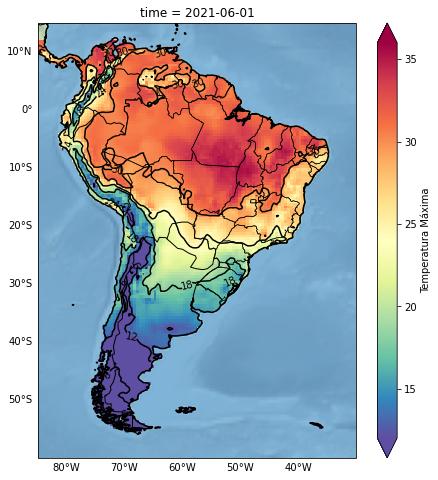

In [10]:
# Criar a Figura
fig, ax = plt.subplots(figsize=(15, 8), subplot_kw={
                       'projection': ccrs.PlateCarree()}) # Definr


# Plot da temperatura máxima (Preenchido)
ds_mensal.tmax.sel(time='2021-06-01').plot(cmap='Spectral_r', robust=True, vmin=12, vmax=36, 
                                           transform=ccrs.PlateCarree(), cbar_kwargs={
                                           "orientation": "vertical",
                                           "aspect": 20,
                                           "pad": 0.025,
                                           "label": 'Temperatura Máxima',
                                           "extend":"both"    
                                       })

# Plot com linhas  de contorno
cs = ds_mensal.tmax.sel(time='2021-06-01').plot.contour(levels=15, colors='k',
                                           transform=ccrs.PlateCarree(), 
                                                   add_colorbar=False,
                                                  add_labels=True,
                                                       ax=ax)
# Labels do grafico de contorno
ax.clabel(cs, fmt='%d')

# Fazendo o recorte na figura
ax.set_extent([-85, -30, -60, 15], crs=ccrs.PlateCarree())
##########################################################
gl = ax.gridlines(draw_labels=True, linewidth=0, color='black', alpha=0.5, linestyle='-')

# Definir quantidade de latitude e longitude que irão aparecer no plot
# gl.xlocator = mticker.FixedLocator(np.arange(-85, -30, 5))
# gl.ylocator = mticker.FixedLocator(np.arange(-60, 15, 5))
gl.top_labels = False
gl.right_labels = False
ax.add_feature(cfeature.COASTLINE.with_scale('50m'), linewidth=1.6,edgecolor='k', zorder=10) # Linhas de costa
ax.add_feature(cfeature.STATES.with_scale('50m'),linewidth=0.6,edgecolor='k', zorder=10) 
ax.add_feature(cfeature.BORDERS) # Bordas
ax.stock_img() # imagem de fundo

## Função Auxiliar

* **Em determinadas situações, o nosso código pode se tornar extenso e repetitivo, neste caso, é interessante trabalharmos com loops ou funções.**

* **Vamos criar uma função que nos auxilie a plotar nossos mapas**

In [11]:
# Criando Função
##########################################################
def plot_map(ax, min_lon=-85, max_lon=-30, min_lat=-60, max_lat=15, 
             ticks=False, background=True):

    # Adcionando Features
    ax.add_feature(cfeature.COASTLINE.with_scale('50m'), linewidth=1.6,edgecolor='k', zorder=10) # Linhas de costa
    ax.add_feature(cfeature.STATES.with_scale('50m'),linewidth=0.6,edgecolor='k', zorder=10) # Estados
    ax.add_feature(cfeature.BORDERS) # Bordas
    
    # Adicionar ticks 
    if ticks:
        # Definir os xticks para longitude
        ax.set_xticks(np.arange(-180, 181, 5), crs=ccrs.PlateCarree())
        lon_formatter = cticker.LongitudeFormatter()
        ax.xaxis.set_major_formatter(lon_formatter)

        # Definir os yticks para latitude
        ax.set_yticks(np.arange(-90, 91, 5), crs=ccrs.PlateCarree())
        lat_formatter = cticker.LatitudeFormatter()
        ax.yaxis.set_major_formatter(lat_formatter)

        ax.tick_params(axis='both', direction='out', which='both')
    else:
        gl = ax.gridlines(draw_labels=True, linewidth=0, color='black', alpha=0.5, linestyle='-')
        gl.top_labels = False
        gl.right_labels = False
        
    # Definir os limites do mapa
    ax.set_extent([min_lon, max_lon, min_lat, max_lat], crs=ccrs.PlateCarree())
    ##########################################################
    
    # Plano de fundo
    if background:
        ax.stock_img() # imagem de fundo
    return ax

* Vamos calcular a temperatura média e Calcular a média sazonal 

* Primeiro vamos abrir o banco de dados

In [12]:
# Banco de dados 
ds_tmin = xr.open_dataset('tmin.2021.nc').sel(lat=slice(12, -60), lon=slice(275, 330))
# Calcular a temperatura média
tmean = ((ds_tmax.tmax + ds_tmin.tmin)/2)

## Plot fazendo o recorte em uma area (Norte - America do Sul) e inserindo pontos de estações

* **Neste exemplo vamos fazer um plot da temperatura, inserindo pontos referente as estações do INMET**

In [13]:
import pandas as pd

* vamos abrir o arquivo com as coordenadas das estações

In [14]:
df = pd.read_excel('AutomaticasINMET_Norte.xlsx')

* Guardas as coordenadas em variaveis

In [15]:
# Guardar os valores de lat e lon em variaveis
lons = df.Longitude
lats = df.Latitude

* Para plotar as coordenadas das estações no mapa podemos utilizar a função **`scatter`** do matplotlib e definindo um parametro chamado de transform com a Projeção 

<GeoAxesSubplot:title={'center':'CPC - Global Temperature'}, xlabel='Longitude', ylabel='Latitude'>

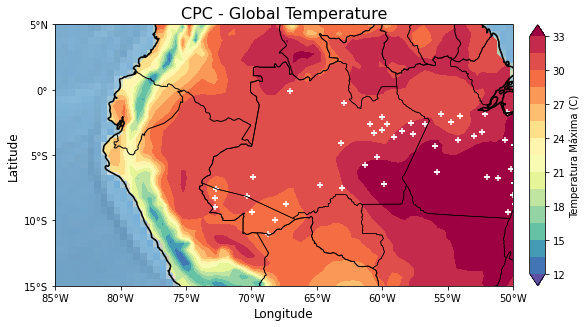

In [16]:
# Criar a Figura
fig, ax = plt.subplots(figsize=(10, 8), subplot_kw={
                       'projection': ccrs.PlateCarree()}) # Definir projeção


# Definir niveis
levels = np.arange(12., 34., 1.5)

# Plot da temperatura máxima (Preenchido)
ds_mensal.tmax.sel(time='2021-06-01').plot.contourf(cmap='Spectral_r', levels=levels,
                                           transform=ccrs.PlateCarree(), cbar_kwargs={
                                           "orientation": "vertical",
                                           "aspect": 15,
                                           "pad": 0.03,
                                            "shrink":0.6,
                                           "label": 'Temperatura Máxima (C)',
                                           "extend":"both"    
                                       })

# Plotar as coordenadas das estações
ax.scatter(lons, lats, color='white', marker='+', transform=ccrs.PlateCarree())

# Titulo
ax.set_title('CPC - Global Temperature', fontsize=16)
#######
# Labels
ax.set_ylabel('Latitude', fontsize=12)
ax.set_xlabel('Longitude', fontsize=12)

# Função auxiliar para plotar o mapa
plot_map(ax, min_lon=-85, max_lon=-50, min_lat=-15, max_lat=5,
    background=True, ticks=True)

## Painel de Mapas

* **Neste exemplo vamos:**

1 - Calcular a temperatura média

2 - Calcular a sazonalidade média entre as estações

3 - Criar um painel de plots

4 - Plotar os dados de Temperatura entre as estações

* Calcular a temperatura média sazonal

In [17]:
tmean_sazonal = tmean.groupby('time.season').mean(dim='time')

<GeoAxesSubplot:>

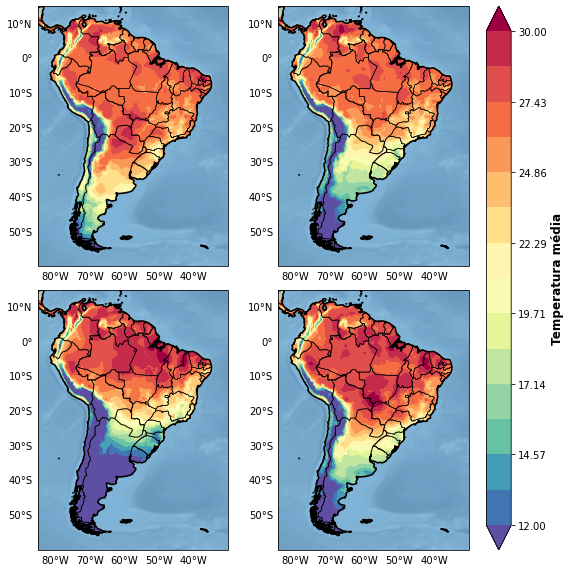

In [18]:
# Criar a Figura
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(figsize=(16, 10),
                                             ncols=2, nrows=2,
                                             gridspec_kw={'hspace':0.09, 'wspace':-0.52},
                                             subplot_kw={
                       'projection': ccrs.PlateCarree()}) # Definir projeçao


# Plot da temperatura máxima
cs = tmean_sazonal.sel(season='DJF').plot.contourf(cmap='Spectral_r', robust=True, vmin=12, vmax=30,levels=15, 
                                           transform=ccrs.PlateCarree(), 
                                           ax=ax1, 
                                           add_colorbar=False, add_labels=False)

tmean_sazonal.sel(season='MAM').plot.contourf(cmap='Spectral_r', robust=True, vmin=12, vmax=30, levels=15,
                                              transform=ccrs.PlateCarree(), 
                                              ax=ax2, add_colorbar=False, add_labels=False)

tmean_sazonal.sel(season='JJA').plot.contourf(cmap='Spectral_r', robust=True, vmin=12, vmax=30,levels=15, 
                                              transform=ccrs.PlateCarree(),
                                              ax=ax3, add_colorbar=False, add_labels=False)

tmean_sazonal.sel(season='SON').plot.contourf(cmap='Spectral_r', robust=True, vmin=12, vmax=30, levels=15,
                                              transform=ccrs.PlateCarree(), 
                                              ax=ax4, add_colorbar=False, add_labels=False)

cbar = fig.colorbar(cs, ax=[ax1, ax2, ax3, ax4],
                   pad=0.02,
                   shrink=1,
                   orientation='vertical')
cbar.set_label(label='Temperatura média', size='large', weight='bold')
cbar.ax.tick_params(labelsize='medium')

# PLot maps
plot_map(ax1)
plot_map(ax2)
plot_map(ax3)
plot_map(ax4)

## Plot Correlação Temperatura média do ar X Precipitação (com a significancia)

In [19]:
from esmtools.stats import corr # Correlação
import cmocean.cm as cm

* **Preparando os dados**

1 - Primeiro vamos abrir o banco de dados

2 - Calcular a temperatura média 

3 - Fazer o teste de correlação

4 - Plot

In [20]:
# Abrindo o banco de dados
tmax = xr.open_dataset('tmax.2021.nc')
tmin = xr.open_dataset('tmin.2021.nc')
precip = xr.open_dataset('precip.2021.nc')

In [21]:
# Calcular a temperatura média
tmean = ((tmax.tmax + tmin.tmin)/2)
# Calcular a correlação
cor, sig = corr(x=tmean, y=precip.precip, dim='time', return_p=True)

* Vamos criar uma matriz com dados de lat e lon

In [22]:
# Cria uma matriz com os dados de longitude e latitude
lons_i, lats_i = np.meshgrid(cor.lon, cor.lat)

* Agora, vamos filtrar os valores de correlação que foram estatisticamente signficativos

In [23]:
alpha = 0.05 # limiar para a signficância
sig_area = np.where(sig < alpha) # Define o nivel desejado de significancia

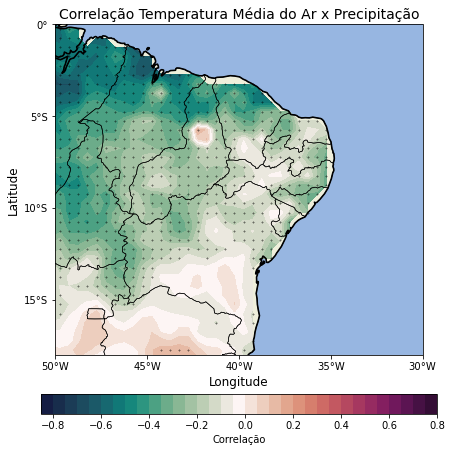

In [24]:
# Criar a Figura
fig, ax = plt.subplots(figsize=(10, 8), subplot_kw={
                       'projection': ccrs.PlateCarree()}) # Definir Projeção de Robinson

# Escala do plot
levels = np.arange(-0.85, 0.85, 0.05)

cor.plot.contourf(cmap=cm.curl, levels=levels, transform=ccrs.PlateCarree(),
         ax=ax,
         cbar_kwargs={
                   "orientation": "horizontal",
                   "aspect": 20,
                   "pad": 0.09,
                    "shrink":0.71,
                   "label": 'Correlação',
                   "extend":"both"    
                               })

# Plotar apenas os niveis significancia menores que 0.05
ax.scatter(lons_i[sig_area], lats_i[sig_area], marker='x', s=0.9,
           c='k', alpha=0.5, transform=ccrs.PlateCarree())


#### PLOT COUNTORF HATCHES
# cor.where(sig < 0.05).plot.contourf(colors='none',
#                                                    ax=ax,
#                                                    hatches=['.'],
#                                                    transform=ccrs.PlateCarree(),
#                                                    add_colorbar=False)


plot_map(ax, min_lon=-50, max_lon=-30, min_lat=-18, max_lat=0,
    background=False, ticks=True)

# Titulo
ax.set_title('Correlação Temperatura Média do Ar x Precipitação', fontsize=14)
#######
# Labels
ax.set_ylabel('Latitude', fontsize=12)
ax.set_xlabel('Longitude', fontsize=12)

ax.add_feature(cfeature.LAND)
ax.add_feature(cfeature.OCEAN)

# Terminamos por aqui !!

<center> <img src=https://i0.wp.com/www.vortexmag.net/wp-content/uploads/2018/11/15181167_709671142530389_8094609873682064980_n.jpg?resize=750%2C563&ssl=1 width=50% heigth=25%> <center>    

# Leituras

* xarray https://docs.xarray.dev/en/stable/

* cartopy https://scitools.org.uk/cartopy/docs/latest/

* pandas https://pandas.pydata.org/docs/

* numpy https://numpy.org/doc/stable/

* kaggle https://www.kaggle.com/

* Python Academy Blog https://pythonacademy.com.br/blog/